In [2]:
import numpy as np
import pandas as pd

# Given values
h = 0.1
x0 = np.pi / 4
# Points
x_minus = x0 - h
x_plus = x0 + h
# Function and true derivative
f = np.sin
true_derivative = np.cos(x0)
# Approximation methods
forward = (f(x_plus) - f(x0)) / h
backward = (f(x0) - f(x_minus)) / h
central = (f(x_plus) - f(x_minus)) / (2 * h)
# Compute errors
abs_errors = [abs(val - true_derivative) for val in (forward, backward, central)]
rel_errors = [err / abs(true_derivative) * 100 for err in abs_errors]
# Prepare results
methods = ["Forward Difference", "Backward Difference", "Central Difference"]
df = pd.DataFrame({
    "Method": methods,
    "Approximation": [forward, backward, central],
    "Absolute Error": abs_errors,
    "Relative Error (%)": rel_errors
})
# Display the table
print(df.to_string(index=False))

             Method  Approximation  Absolute Error  Relative Error (%)
 Forward Difference       0.670603        0.036504            5.162418
Backward Difference       0.741255        0.034148            4.829251
 Central Difference       0.705929        0.001178            0.166583


In [3]:
import numpy as np

# Parameters
h = 0.1
x0 = 0.5
# Define the function
def f(x):
    return np.exp(-x**2)
# Exact second derivative: f''(x) = (4x^2 - 2) * e^{-x^2}
def exact_f2(x):
    return (4*x**2 - 2) * np.exp(-x**2)
# Points for finite difference
x_minus = x0 - h
x_plus  = x0 + h
# Central difference (2nd-order) approximation:
approx_f2 = (f(x_plus) - 2*f(x0) + f(x_minus)) / (h**2)
# Exact value
exact_value = exact_f2(x0)
# Errors
abs_error = abs(approx_f2 - exact_value)
rel_error = abs_error / abs(exact_value) * 100
# Output results
print(f"x0 = {x0}, h = {h}")
print(f"Approx f''(x0): {approx_f2:.6f}")
print(f"Exact  f''(x0): {exact_value:.6f}")
print(f"Absolute Error: {abs_error:.6f}")
print(f"Relative Error: {rel_error:.5f}%")

x0 = 0.5, h = 0.1
Approx f''(x0): -0.778145
Exact  f''(x0): -0.778801
Absolute Error: 0.000656
Relative Error: 0.08419%


In [4]:
import numpy as np
import pandas as pd

# Given tabular data
x = np.array([1.0, 1.1, 1.2, 1.3, 1.4])
f = np.array([2.71, 3.00, 3.32, 3.67, 4.05])
h = 0.1
points = [1.1, 1.2, 1.3]
results = []
for xi in points:
    i = np.where(x == xi)[0][0]
    deriv = (f[i+1] - f[i-1]) / (2*h)
    results.append((xi, deriv))
df = pd.DataFrame(results, columns=['x', "f'(x)"])
print(df.to_string(index=False))

  x  f'(x)
1.1   3.05
1.2   3.35
1.3   3.65


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x0 = 2.0
exact = 1 / x0
hs = np.array([0.1, 0.01, 0.001])
approxs = []
rel_errors = []
# Central-difference approx for each h
for h in hs:
    f = np.log
    deriv = (f(x0 + h) - f(x0 - h)) / (2 * h)
    approxs.append(deriv)
    rel_errors.append(abs(deriv - exact) / abs(exact) * 100)
# Tabulate results
df = pd.DataFrame({
    'h':           hs,
    "Approx f'":  approxs,
    "Exact f'":   [exact]*len(hs),
    "Rel Error (%)": rel_errors
})
print(df.to_string(index=False))

    h  Approx f'  Exact f'  Rel Error (%)
0.100   0.500417       0.5       0.083459
0.010   0.500004       0.5       0.000833
0.001   0.500000       0.5       0.000008


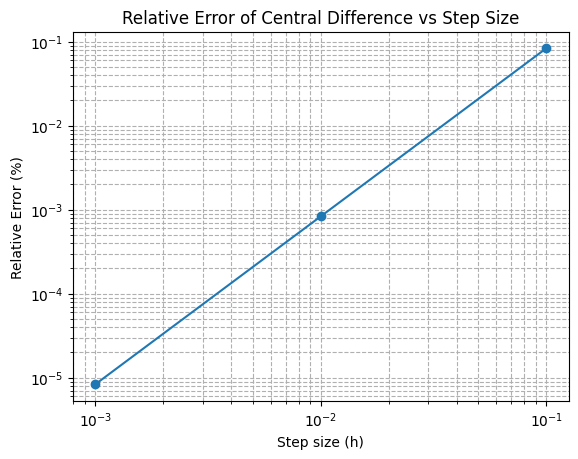

In [6]:
# Plot on log-log axes
plt.figure()
plt.loglog(hs, rel_errors, marker='o')
plt.xlabel('Step size (h)')
plt.ylabel('Relative Error (%)')
plt.title("Relative Error of Central Difference vs Step Size")
plt.grid(True, which="both", ls="--")
plt.show()